In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualisation and plotting
import matplotlib.pyplot as plt # data plotting
import warnings

# Seaborn default configuration
sns.set_style("darkgrid")

# set the custom size for my graphs
sns.set(rc={'figure.figsize':(8.7,6.27)})
# filter all warnings
warnings.filterwarnings('ignore') 
import os


###### The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Preview of Data

    There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
    There are no null values, so we don't have to worry about that.
    There are 50 observations of each species (setosa, versicolor, virginica).


    Id
    SepalLengthCm
    SepalWidthCm
    PetalLengthCm
    PetalWidthCm
    Species

Sepal Width vs. Sepal Length

In [9]:

df=pd.read_csv(r"C:\Users\ibast\Downloads\Iris.csv")

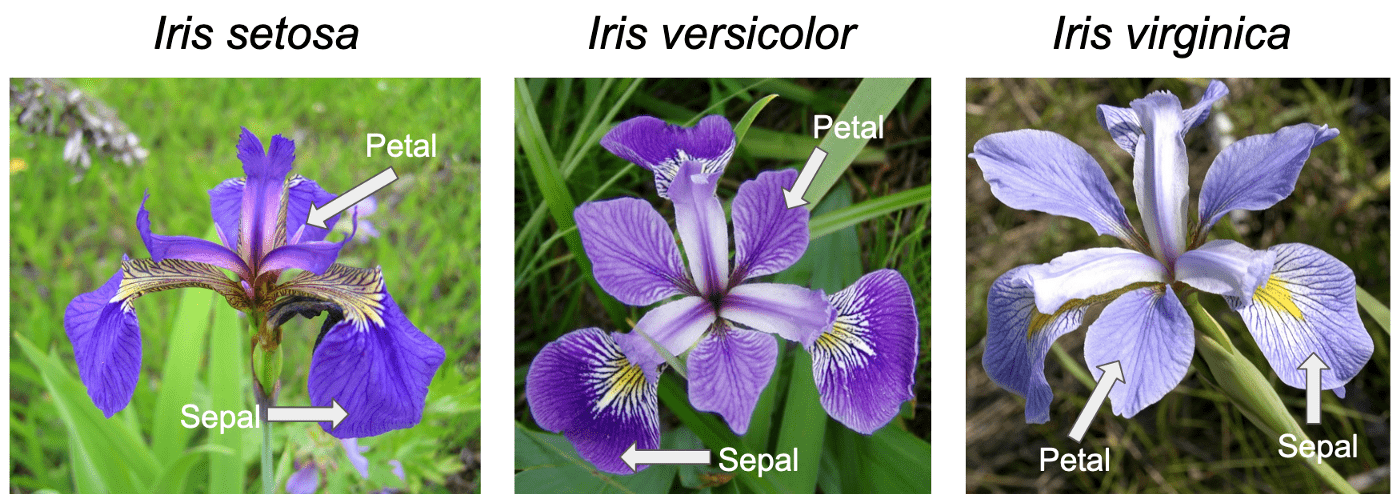

In [33]:
from PIL import Image
img=Image.open(r"C:\Users\ibast\OneDrive\Pictures\Iris-Dataset-Classification.png")
img

In [10]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [14]:
rows, col = df.shape
print("Rows : %s, column : %s" % (rows, col))

Rows : 150, column : 6


### Data Visualization

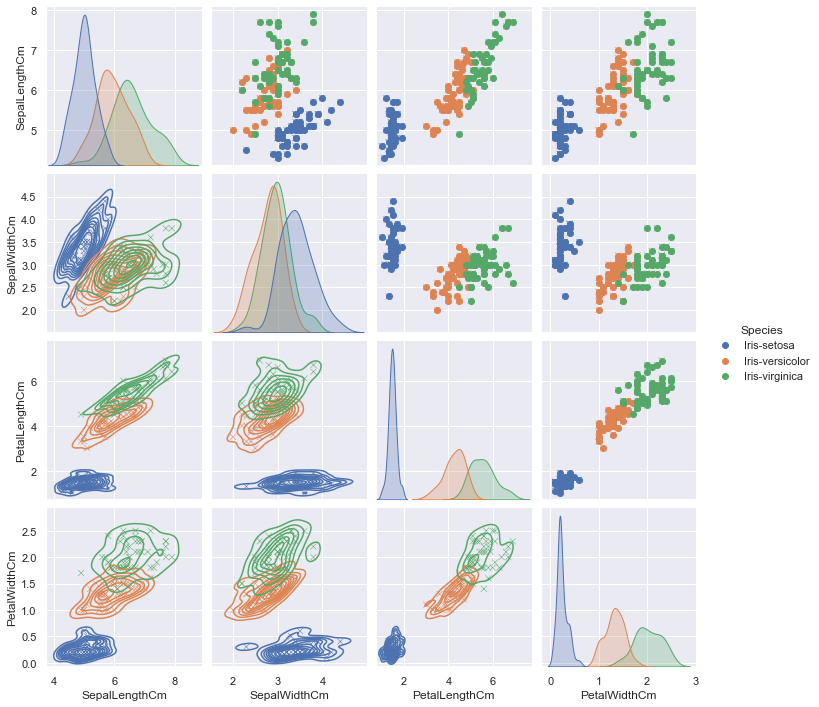

In [16]:
snsdata = df.drop(['Id'], axis=1)
g = sns.pairplot(snsdata, hue='Species', markers='x')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
encode = LabelEncoder()
df.Species = encode.fit_transform(df.Species)

print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0


In [25]:
# train-test-split   
train , test = train_test_split(df,test_size=0.2,random_state=0)

print('shape of training data : ',train.shape)
print('shape of testing data',test.shape)

shape of training data :  (120, 6)
shape of testing data (30, 6)


In [26]:
# train-test-split   
train , test = train_test_split(df,test_size=0.2,random_state=0)

print('shape of training data : ',train.shape)
print('shape of testing data',test.shape)

shape of training data :  (120, 6)
shape of testing data (30, 6)


In [27]:
# seperate the target and independent variable
train_x = train.drop(columns=['Species'],axis=1)
train_y = train['Species']

test_x = test.drop(columns=['Species'],axis=1)
test_y = test['Species']

In [28]:
model = LogisticRegression()

model.fit(train_x,train_y)

predict = model.predict(test_x)

print('Predicted Values on Test Data',encode.inverse_transform(predict))

print('\n\nAccuracy Score on test data : \n\n')
print(accuracy_score(test_y,predict))

Predicted Values on Test Data ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


Accuracy Score on test data : 


1.0
